# Objectives
1. On what days people take more ubers
2. catergory wise distribution
3. People prefer to take ubers for short distance or long distance (let short distance is <10)
4. purpose wise distribution
5. Average length of trip
6. trips per month or per week 
7. What Hour Do Most People Take Uber To Their Destination?
8. Number of trips per day
9. Where do people start boarding their trips the most
10. Where do people stop their trips the most 

In [2]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

In [3]:
workbook = pd.ExcelFile(r'C:\Users\mehak\OneDrive\Desktop\Projects\Uber\My Uber Drives - 2016.xls')


In [4]:
df = pd.read_excel(workbook,'Final')

In [5]:
df

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   START_TIME  1153 non-null   object        
 2   END_DATE    1155 non-null   datetime64[ns]
 3   END_TIME    1155 non-null   object        
 4   CATEGORY    1155 non-null   object        
 5   START       1155 non-null   object        
 6   STOP        1155 non-null   object        
 7   MILES       1155 non-null   float64       
 8   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 81.3+ KB


In [7]:
df.columns

Index(['START_DATE', 'START_TIME', 'END_DATE', 'END_TIME', 'CATEGORY', 'START',
       'STOP', 'MILES', 'PURPOSE'],
      dtype='object')

In [8]:
df.isnull().any()

START_DATE    False
START_TIME     True
END_DATE      False
END_TIME      False
CATEGORY      False
START         False
STOP          False
MILES         False
PURPOSE        True
dtype: bool

In [9]:
df.isnull().sum()

START_DATE      0
START_TIME      2
END_DATE        0
END_TIME        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [10]:
df['START_TIME'] = df['START_TIME'].fillna('00:00:00')

In [11]:
df[df.duplicated()]

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
492,2016-06-28,23:34:00,2016-06-28,23:59:00,Business,Durham,Cary,9.9,Meeting


In [12]:
df.drop_duplicates()

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [13]:
df=df.dropna()
df

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [14]:
df.shape

(653, 9)

In [15]:
df['week_day']=df['START_DATE'].dt.day_name()

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/2240515002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day']=df['START_DATE'].dt.day_name()


In [16]:
df

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,week_day
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday
5,2016-01-06,17:15:00,2016-01-06,17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday
1151,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday
1152,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday
1153,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday


## Day wise distribution

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: week_day, dtype: int64

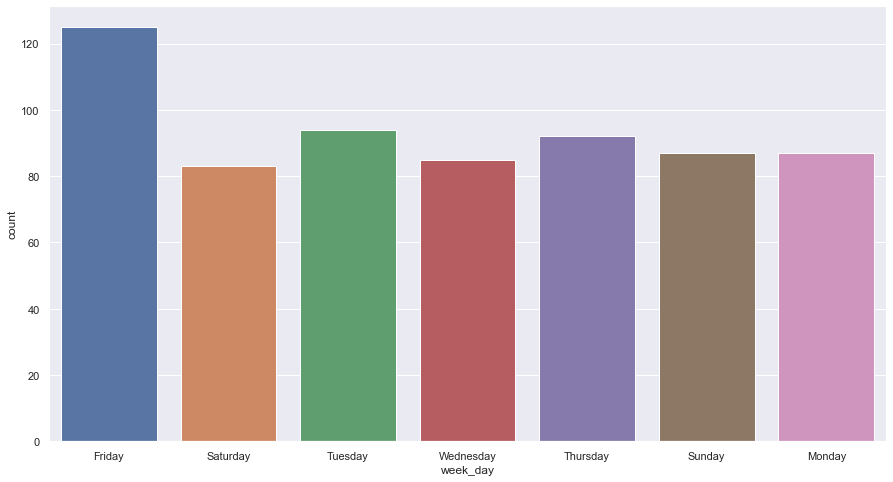

In [17]:
g1 = sns.countplot(x='week_day',data=df)
day_counts = df['week_day'].value_counts()
day_counts

## Category wise distribution

Business    647
Personal      6
Name: CATEGORY, dtype: int64

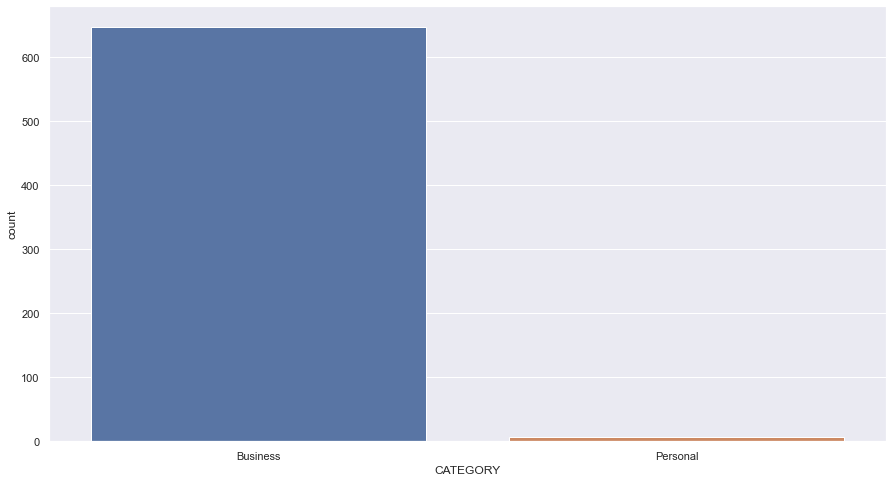

In [18]:
g2 = sns.countplot(x='CATEGORY',data=df)
cat_counts = df['CATEGORY'].value_counts()
cat_counts

## For Local distance or not

In [19]:
df['Local_Dist'] = df['MILES']<=10
df['Local_Dist'].value_counts()

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/1482409857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Local_Dist'] = df['MILES']<=10


True     468
False    185
Name: Local_Dist, dtype: int64

## Purposewise Distribution

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

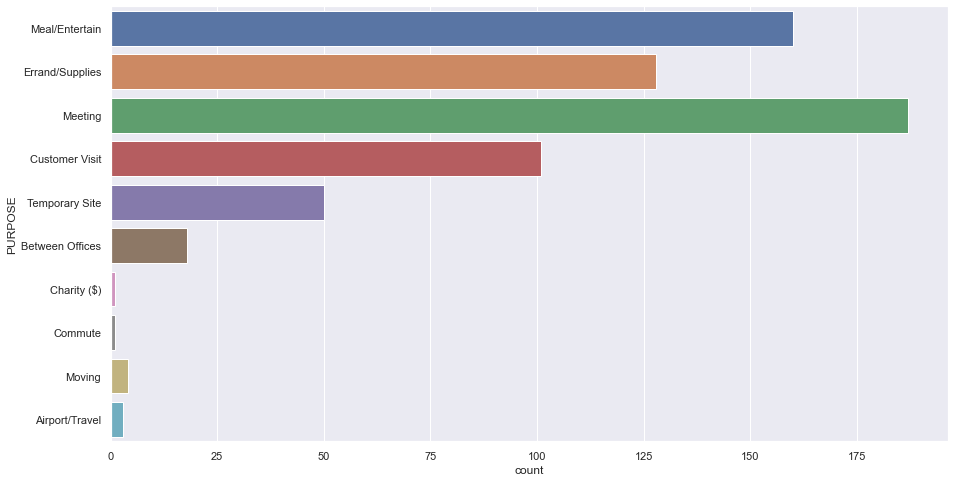

In [20]:
g4 = sns.countplot(y='PURPOSE',data=df)
purpose_counts = df['PURPOSE'].value_counts()
purpose_counts

## Average length of trip

In [21]:
df['MILES'].mean()

11.196324655436444

## trips per day

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/1795520228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY'] = df['START_DATE'].dt.day


21    31
29    30
19    30
18    30
4     28
28    27
12    27
8     25
1     25
22    24
7     23
20    22
6     22
14    21
11    21
5     21
3     20
26    20
27    20
25    19
10    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
30    12
9     12
31    10
Name: DAY, dtype: int64

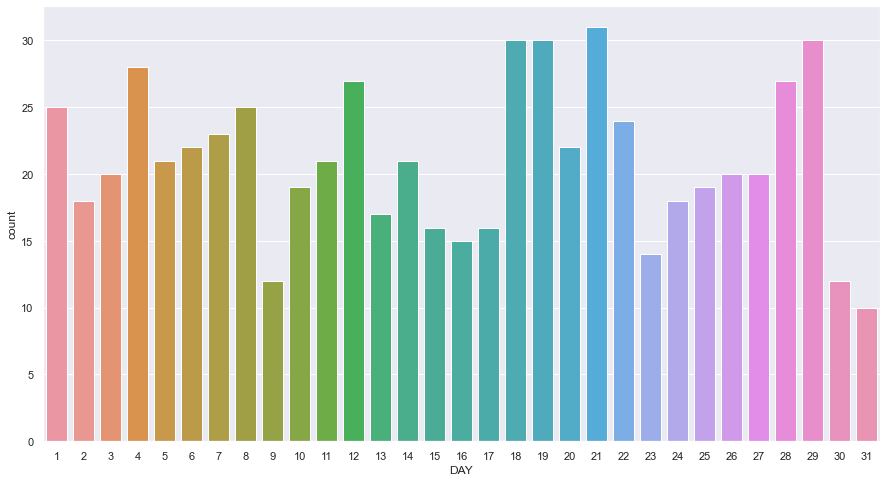

In [22]:
df['DAY'] = df['START_DATE'].dt.day
g5 = sns.countplot(x='DAY',data=df)

day_counts = df['DAY'].value_counts()
day_counts

## Trips per week

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/3708630543.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['START_DATE'].dt.week
C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/3708630543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['START_DATE'].dt.week


51    48
52    40
7     29
23    26
11    24
9     23
5     22
4     21
49    20
46    19
6     18
47    18
2     17
29    17
26    17
22    17
10    15
50    14
48    14
45    14
17    14
25    13
18    13
27    12
24    12
15    12
13    11
16    11
1     10
43    10
20    10
19    10
8     10
3      9
12     9
14     9
44     8
21     7
41     5
33     5
28     4
42     3
32     3
31     3
30     3
53     2
40     1
35     1
Name: week, dtype: int64

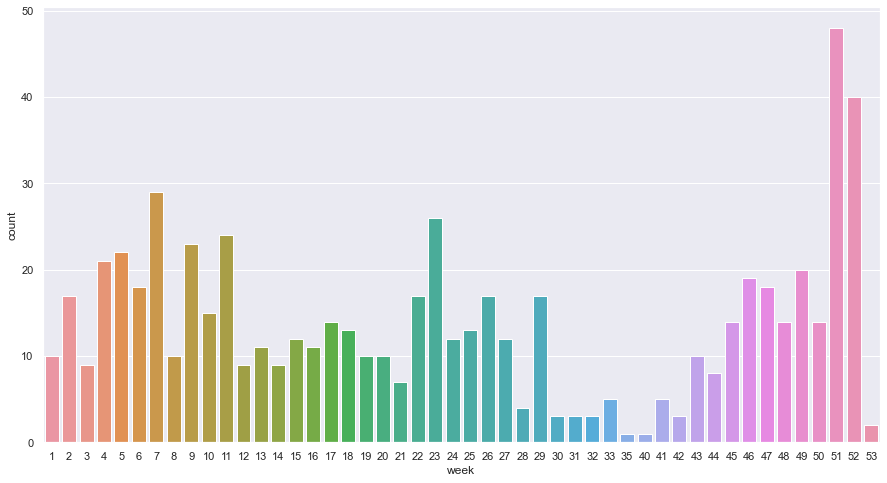

In [23]:
df['week'] = df['START_DATE'].dt.week
g5 = sns.countplot(x='week',data=df)
week_counts = df['week'].value_counts()
week_counts

## trips per month

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/3655935866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['START_DATE'].dt.month


12    134
2      82
6      73
3      71
11     60
1      59
4      50
5      46
7      46
10     20
8      12
Name: month, dtype: int64

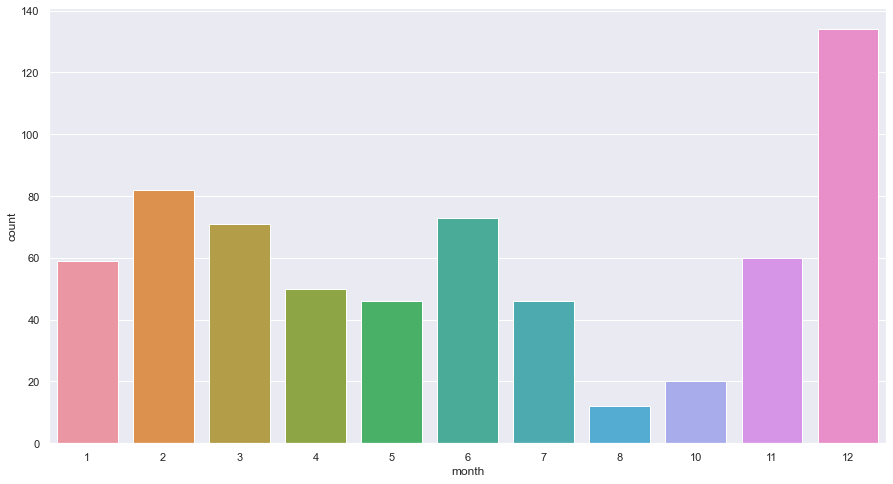

In [24]:
df['month'] = df['START_DATE'].dt.month
g5 = sns.countplot(x='month',data=df)

month_counts = df['month'].value_counts()
month_counts

## Hourwise distribution

C:\Users\mehak\AppData\Local\Temp/ipykernel_20208/2039689011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df['START_TIME'], format='%H:%M:%S').dt.hour
C:\Users\mehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: hour, dtype: int64

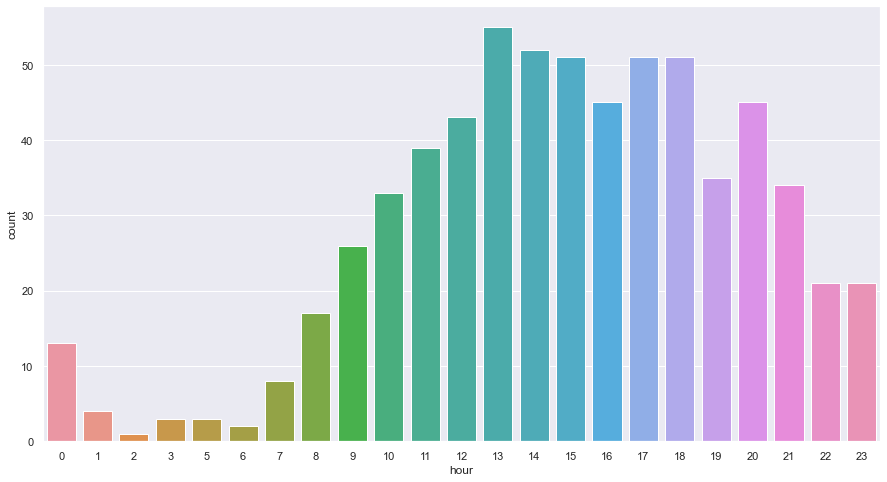

In [25]:
df['hour'] = pd.to_datetime(df['START_TIME'], format='%H:%M:%S').dt.hour

g5 = sns.countplot(df.hour)

hour_counts = df['hour'].value_counts()
hour_counts

C:\Users\mehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: hour, dtype: int64

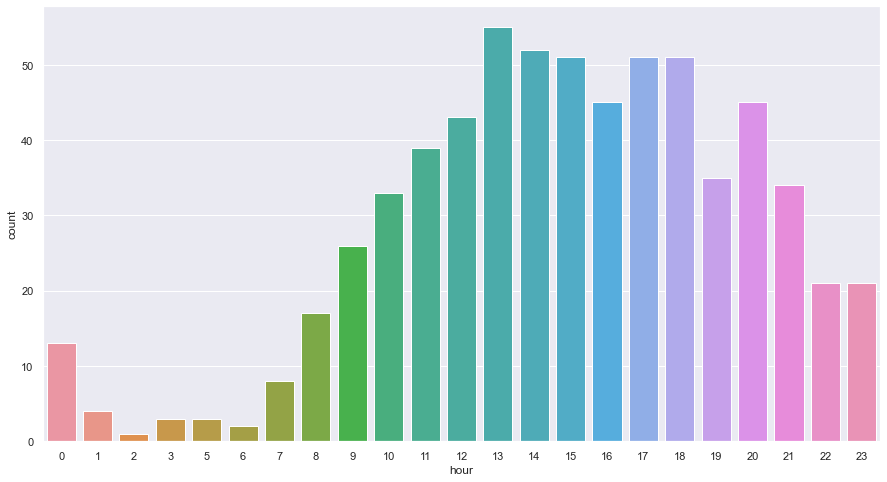

In [26]:
g5 = sns.countplot(df.hour)

hour_counts = df['hour'].value_counts()
hour_counts

## Starting Destination

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Midtown              11
Berkeley              8
San Francisco         7
The Drag              6
Kissimmee             5
Name: START, dtype: int64

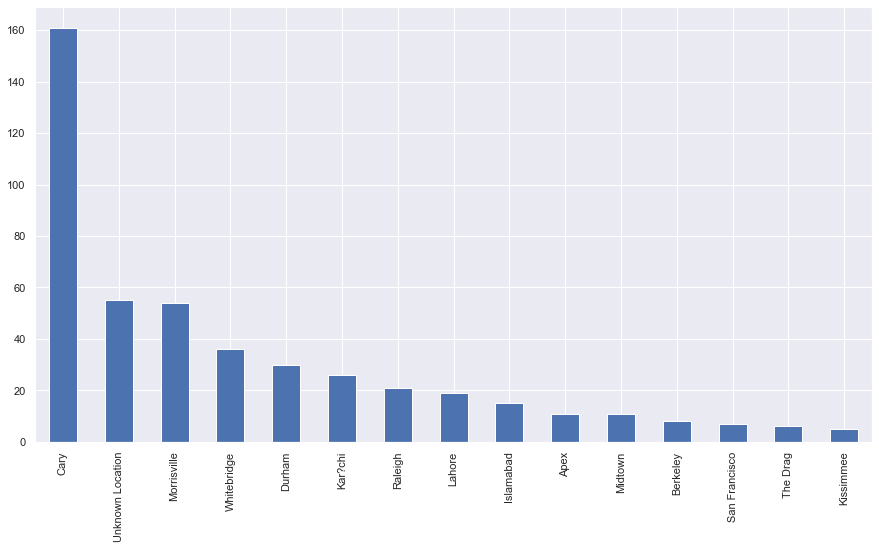

In [40]:
start_count = df['START'].value_counts().head(15)

g9 = start_count.plot(kind = 'bar')
start_count

## Reaching destination

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

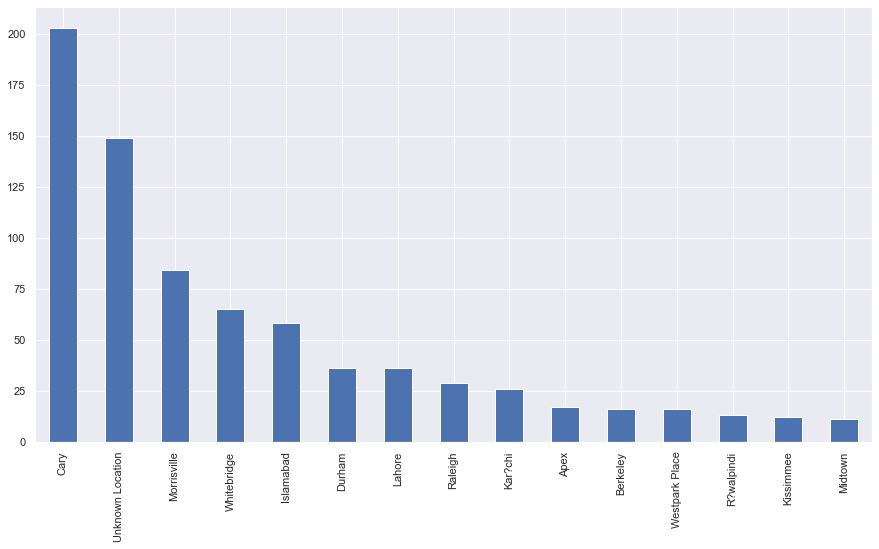

In [58]:
stop_count = df['STOP'].value_counts().head(15)

g9 = stop_count.plot(kind = 'bar')
stop_count

## Most frequent routes

In [57]:
df1 = pd.DataFrame(df.groupby(['START', 'STOP']).size())
df1 = df1.drop(['Unknown Location'])
df1 = df1.rename(columns = {0 : 'count'})
df1 = df1.sort_values(['count'],ascending=False)
df1.head(10)
df1.loc[df1['count'] == max(df1['count'])]

,,count
START,STOP,
Morrisville,Cary,75
